# **A tener en cuenta**


Este notebook está configurado para ejecutar instrucciones de R de forma directa (puedes descargar el notebook y abrirlo en un editor de texto normal para que compruebes la especificación del kernel en los metadatos).


# **Paquetes necesarios**

*   **factoextra:** contiene funciones para extraer y visualizar la salida de diferentes análisis de datos multivariantes
*   **dplyr:** contiene funciones para la manipulación de datos tales como filtrado por filas, selección de columnas, reordenación de filas ...

















# **Preliminares**

Instalamos el paquetes factoextra que contiene la función fviz_cluster, usada para visualizar los clusters encontrados. Instalamos también el paquete dplyr, para usar la función select que nos permitirá seleccionar las variables (columnas) que usaremos durante el análisis 

In [5]:
install.packages("factoextra")
library(factoextra)

Installing package into ‘/home/fleppy/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rstatix’, ‘FactoMineR’, ‘ggpubr’


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [40]:
install.packages("dplyr")
library(dplyr)
install.packages("cluster")
library("cluster")

Installing package into ‘/home/fleppy/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)

Installing package into ‘/home/fleppy/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)



# **Carga y preparación de datos**

Usaremos el conjunto de datos iris para ejemplificar el análisis cluster usando el algoritmo K-means. La base de datos iris contiene información de 150 flores de las especies setosa, versicolor y virginica. Para cada una de las 150 flores se ha anotado la longitud y amplitud del pétalo y del sépalo.

En primer lugar, leemos los datos del fichero iris.csv y los almacenamos en el dataframe *mydata*. A continuación, mostramos el dataframe y observamos que el conjunto de datos no requiere de ningún proceso de limpieza.

In [10]:
mydata <- read.csv("iris.csv", header = TRUE)
mydata

sepal.length,sepal.width,petal.length,petal.width,variety
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,Setosa
4.9,3.0,1.4,0.2,Setosa
4.7,3.2,1.3,0.2,Setosa
4.6,3.1,1.5,0.2,Setosa
5.0,3.6,1.4,0.2,Setosa
5.4,3.9,1.7,0.4,Setosa
4.6,3.4,1.4,0.3,Setosa
5.0,3.4,1.5,0.2,Setosa
4.4,2.9,1.4,0.2,Setosa


# **Análisis de los datos**


Seleccionamos las columnas petal.length y sepal.length del fichero de datos como variables de trabajo. Usamos para ello la función *select* del paquete ***dplyr***.

In [11]:
df <- select(mydata, petal.length, sepal.length)
df


petal.length,sepal.length
<dbl>,<dbl>
1.4,5.1
1.4,4.9
1.3,4.7
1.5,4.6
1.4,5.0
1.7,5.4
1.4,4.6
1.5,5.0
1.4,4.4


Aplicamos el algoritmo k-means para encontrar un agrupamiento de los datos. Fijamos el número de clusters a 3 y reiniciamos el algoritmo 10 veces. 

La función *kmeans* devuelve un objeto de la clase *kmeans* que tiene varias componentes. Las más importantes son:

*   *cluster:* un vector de enteros (1:k) que indica el cluster al que pertenece cada punto
*   *centers:* una matriz con los centros de los clusters
*   *totss:* suma total de cuadrados
*   *withinss:* vector de la suma de cuadrados dentro del cluster, una componente por cluster
*   *tot.withinss:* suma total de cuadrados dentro del cluster (suma de los valores del vector *withinss*)
*   *betweenss:* suma de cuadrados entre clusters (totss - tot.withinss)
*   *size:* número de puntos en cada cluster









In [12]:
km.res <- kmeans(df, centers = 3, nstart = 10)
km.res

K-means clustering with 3 clusters of sizes 51, 41, 58

Cluster means:
  petal.length sepal.length
1     1.492157     5.007843
2     5.678049     6.839024
3     4.393103     5.874138

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 2 3 2 2 2 2 3 2 2 2 2
[112] 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 2 3 2
[149] 2 3

Within cluster sum of squares by cluster:
[1]  9.893725 20.407805 23.508448
 (between_SS / total_SS =  90.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Dibujamos en unos ejes de coordenadas, usando la función *fviz_cluster* del paquete ***factoextra***, los clusters identificados por el algoritmo kmeans.

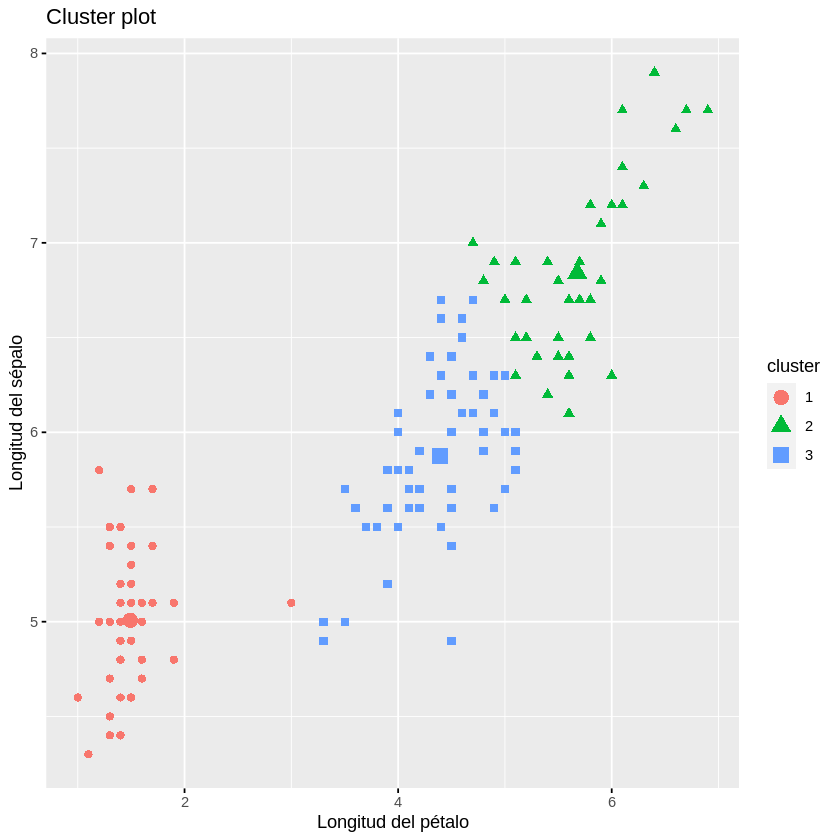

In [13]:
fviz_cluster(km.res, df, geom = "point", ellipse = FALSE, pointsize = 2, ylab = "Longitud del sépalo", xlab = "Longitud del pétalo", stand = FALSE)

**Determinando el valor apropiado de k**

Existen varios procedimientos para determinar el valor apropiado de k. El método *elbow* (codo) consta de los siguientes pasos:


1.   Calcular el agrupamiento para diferentes valores de k.
2.   Para cada valor de k, calcular la suma de cuadrados dentro de los clustes (withins).
3.   Dibujar en unos ejes de coordenadas el valor de *withins* correspondiente a cada valor de k.
4.   Identificar el valor de k en el que se produce un cambio en la curva.





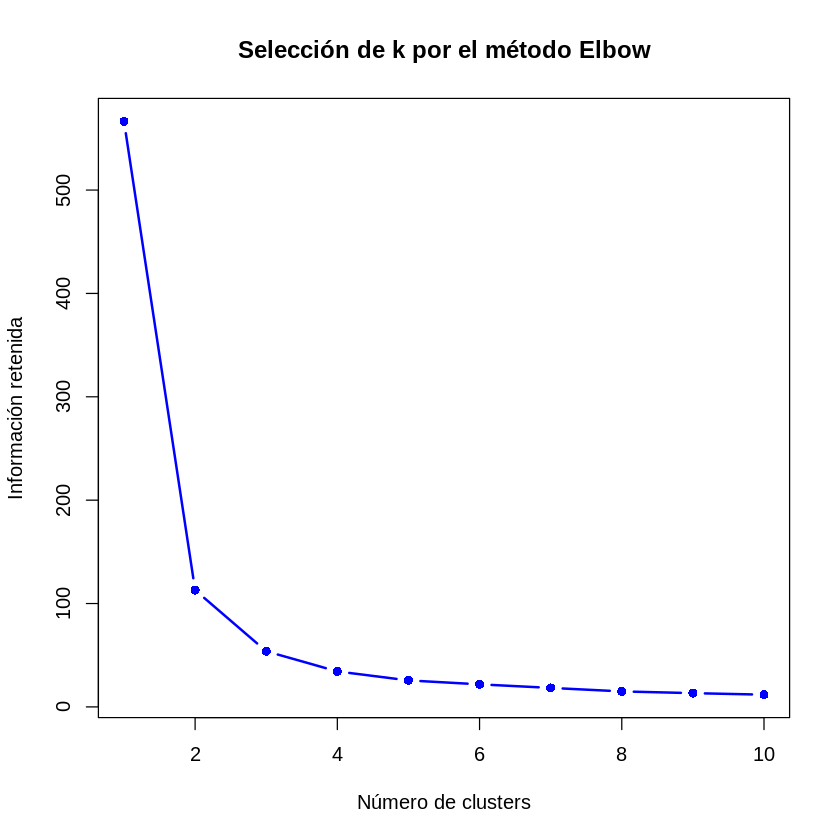

In [14]:
information <- rep(0, 10)
for (i in 1:10){
   KM = kmeans(df, i, nstart = 10)
   information[i] = KM$tot.withinss
}
plot(information~seq(1:10), type="b", pch=16, col=4, ylab="Información retenida", lwd = 2,
     xlab="Número de clusters", main="Selección de k por el método Elbow")

Un procedimiento similar dibuja el ratio *betweens/totss*, conocido como información retenida por el agrupamiento, y selecciona el valor de k en el que se estabiliza la curva.

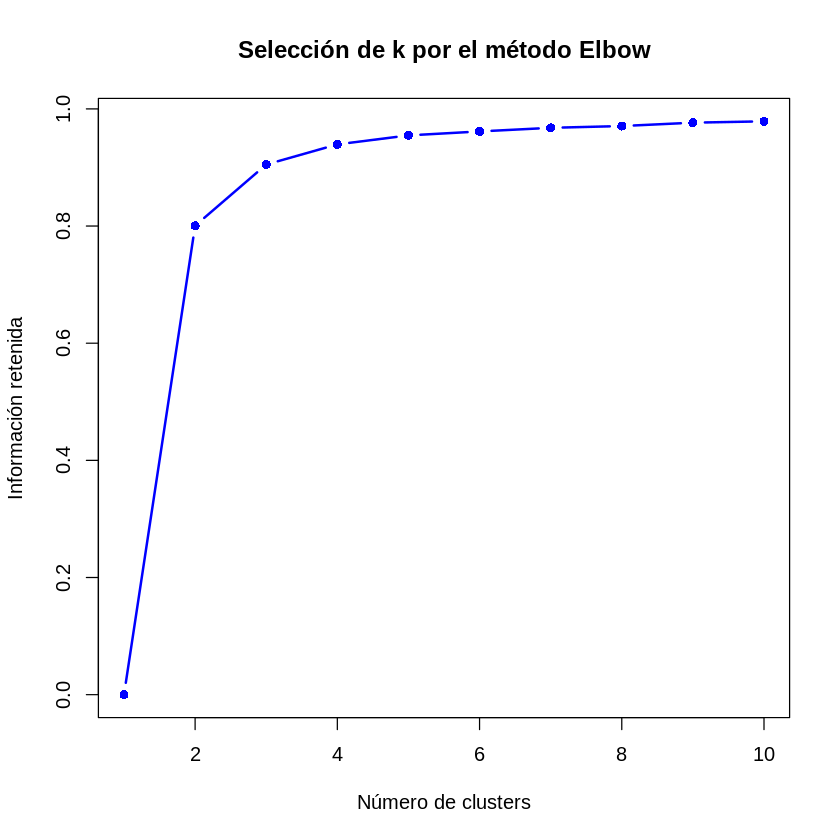

In [15]:
information <- rep(0, 10)
for (i in 1:10){
   KM = kmeans(df, i, nstart = 10)
   information[i] = KM$betweenss/KM$totss
}
plot(information ~ seq(1:10), type="b", pch=16, col = 4, ylab="Información retenida", lwd = 2,
     xlab="Número de clusters", main="Selección de k por el método Elbow")

En ambos casos, el valor apropiado de k es 3 (o 4).

# **Tareas**

1.   Realiza un análisis similar al anterior usando las variables petal.width y sepal.width ¿Qué agrupamiento te parece mejor? ¿El que usa las variables petal.length y sepal.length o el que emplea petal.width y sepal.width? ¿Por qué?
2.   Identifica un "buen" agrupamiento de los estados de EEUU usando las variables disponibles en el fichero USArrests.csv
3.   ¿Qué variables has usado? ¿Por qué?
4.   Describe los clusters obtenidos



In [21]:
# Task 1 -  Perform a similar analysis to the previous one using the 
# variables petal.width and sepal.width. Which grouping do you think is 
# best? The one that uses the variables petal.length and sepal.length 
# or the one that uses petal.width and sepal.width? Why?

df_task1 <- select(mydata, petal.width, sepal.width)
df_task1

km.res_task1 <- kmeans(df_task1, centers = 3, nstart = 10)
km.res_task1

petal.width,sepal.width
<dbl>,<dbl>
0.2,3.5
0.2,3.0
0.2,3.2
0.2,3.1
0.2,3.6
0.4,3.9
0.3,3.4
0.2,3.4
0.2,2.9


K-means clustering with 3 clusters of sizes 48, 49, 53

Cluster means:
  petal.width sepal.width
1    2.052083    3.041667
2    0.244898    3.451020
3    1.309434    2.707547

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 3 2 2 2 2 2 2 2 2 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3
 [75] 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 3 1 3 1 1
[112] 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1

Within cluster sum of squares by cluster:
[1] 6.896458 6.283673 7.422264
 (between_SS / total_SS =  82.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

The original analysis using petal.length and sepal.length reached got sum of squares by cluster to be between_SS/total_SS = 90.5% while our analysis using petal.width and sepal.width only gets 82.1%. This is a sign of information loss, since there are a larger sum of squares and more sparse cluster. A high percentage represent that the average of the between_ss is high and close to the total_ss. Below I used some tools to check how many clusters that is best for width, and the answer is k=3 just as the task above. This means that the best data for clustering is the petal and sepal length.

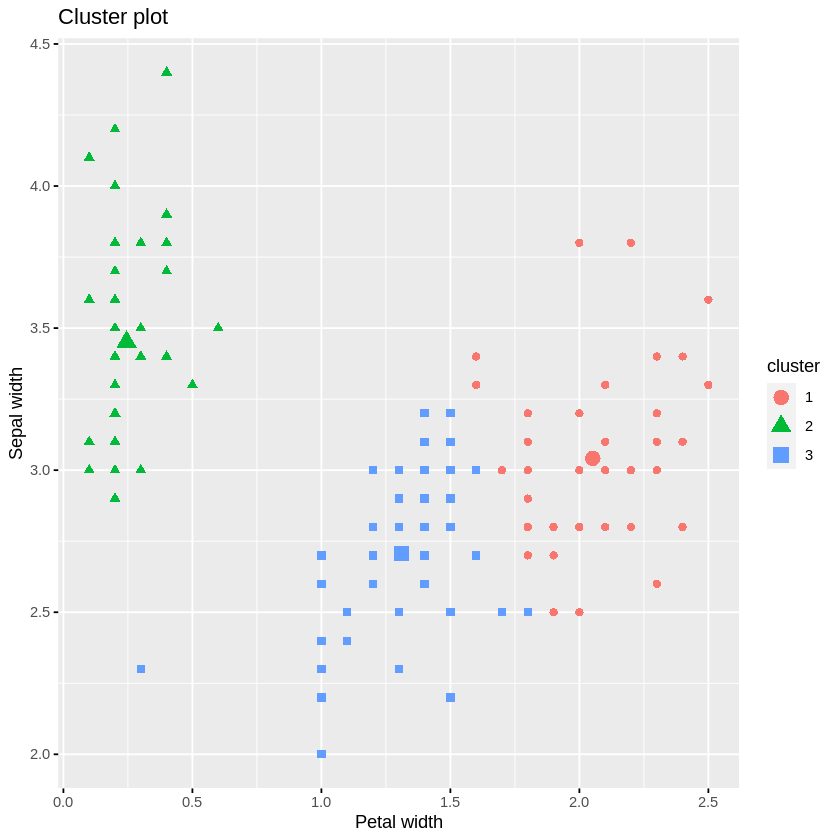

In [24]:
fviz_cluster(km.res_task1,df_task1,geom="point",ellipse=FALSE,pointsize=2, ylab = "Sepal width", xlab = "Petal width", stand = FALSE)

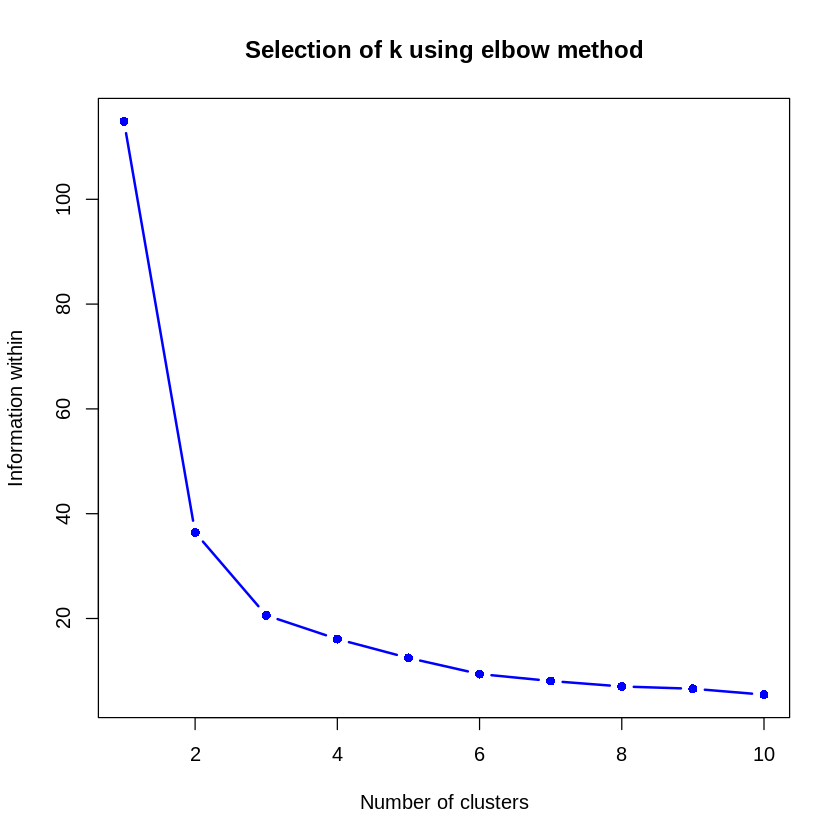

In [30]:
information <- rep(0, 10)
for (i in 1:10){
KM = kmeans(df_task1, i, nstart = 10)
information[i] = KM$tot.withinss
}
plot(information~seq(1:10), type="b", pch=16, col=4, ylab="Information within", lwd = 2,
xlab="Number of clusters", main="Selection of k using the Elbow-method")

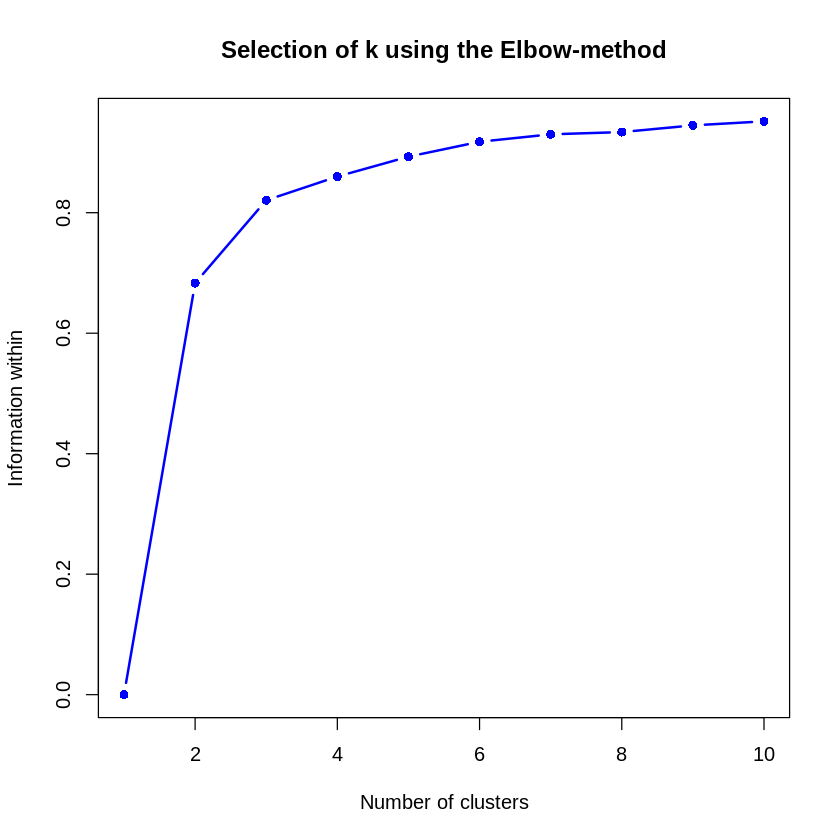

In [31]:
information <- rep(0, 10)
for (i in 1:10){
KM = kmeans(df_task1, i, nstart = 10)
information[i] = KM$betweenss/KM$totss
}
plot(information ~ seq(1:10), type="b", pch=16, col = 4, ylab="Information within", lwd = 2,
xlab="Number of clusters", main="Selection of k using the Elbow-method")

In [55]:
# Task 2 - Identify a "good" grouping of the US states using the variables 
# available in the USArrests.csv file

mydata_task2 <- read.csv("USArrests.csv", header = TRUE) 
df_task2 <- select(mydata_task2, Murder, Assault)
df_task2

km.res_task2 <- kmeans(df_task2, centers = 3, nstart = 10)
km.res_task2

Murder,Assault
<dbl>,<int>
13.2,236
10.0,263
8.1,294
8.8,190
9.0,276
7.9,204
3.3,110
5.9,238
15.4,335


K-means clustering with 3 clusters of sizes 14, 16, 20

Cluster means:
     Murder  Assault
1  8.214286 173.2857
2 11.812500 272.5625
3  4.270000  87.5500

Clustering vector:
 [1] 2 2 2 1 2 1 3 2 2 1 3 3 2 3 3 3 3 2 3 2 1 2 3 2 1 3 3 2 3 1 2 2 2 3 3 1 1 3
[39] 1 2 3 1 1 3 3 1 1 3 3 1

Within cluster sum of squares by cluster:
[1]  6599.094 14581.195 15165.792
 (between_SS / total_SS =  89.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

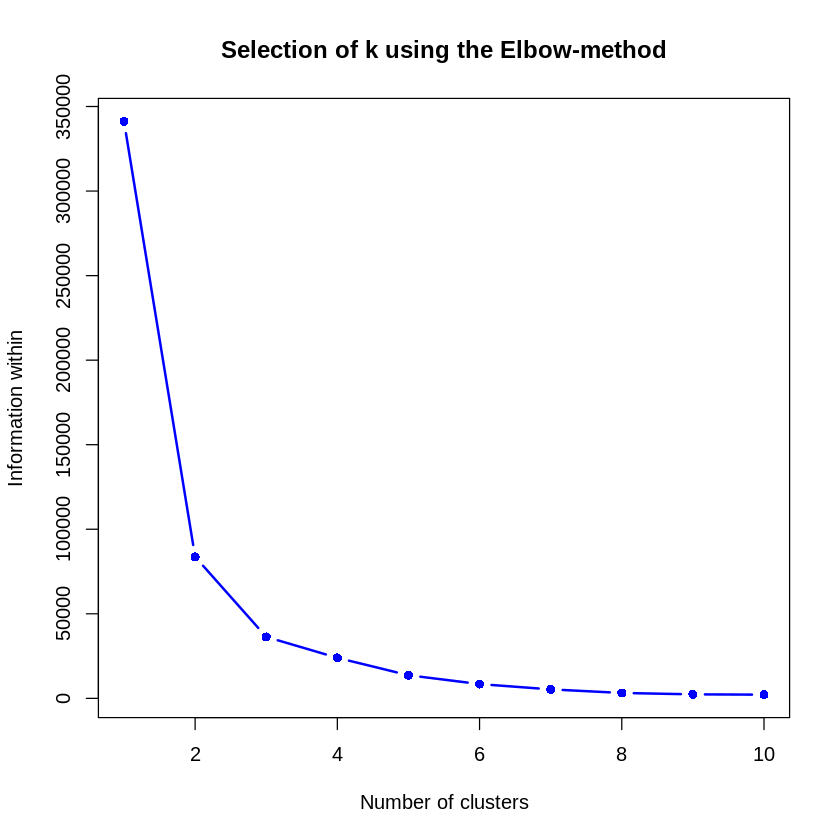

In [56]:
information <- rep(0, 10)
for (i in 1:10){
KM = kmeans(df_task2, i, nstart = 10)
information[i] = KM$tot.withinss
}
plot(information~seq(1:10), type="b", pch=16, col=4, ylab="Information within", lwd = 2,
xlab="Number of clusters", main="Selection of k using the Elbow-method")

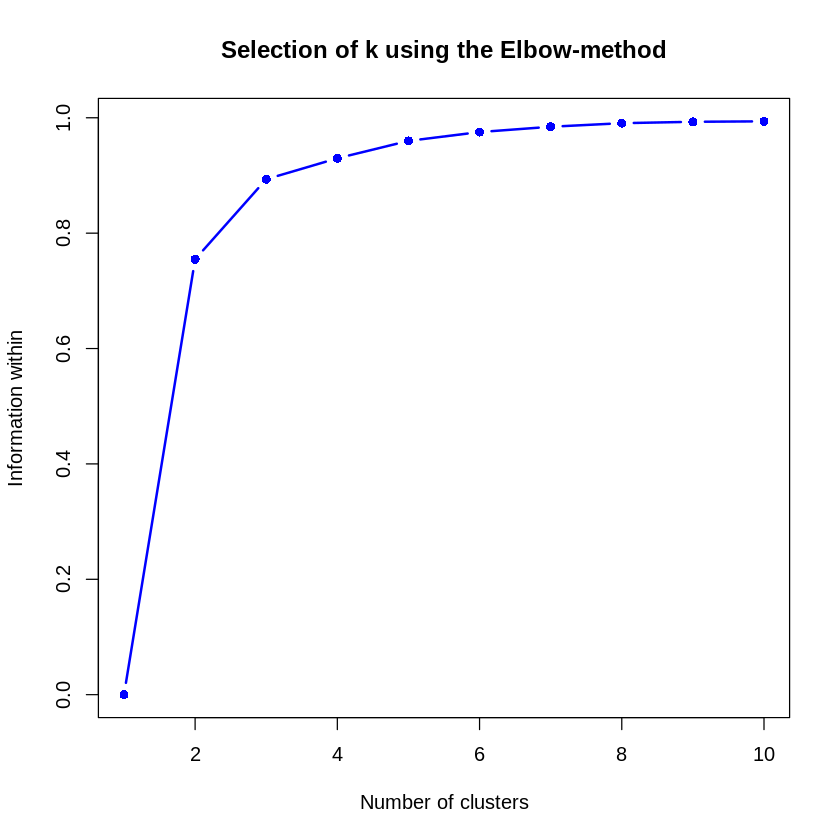

In [57]:
information <- rep(0, 10)
for (i in 1:10){
KM = kmeans(df_task2, i, nstart = 10)
information[i] = KM$betweenss/KM$totss
}
plot(information ~ seq(1:10), type="b", pch=16, col = 4, ylab="Information within", lwd = 2,
xlab="Number of clusters", main="Selection of k using the Elbow-method")

In [59]:
km.res_task2.2 <- kmeans(df_task2, centers = 4, nstart = 10)
km.res_task2.2

K-means clustering with 4 clusters of sizes 16, 10, 10, 14

Cluster means:
     Murder  Assault
1 11.812500 272.5625
2  2.950000  62.7000
3  5.590000 112.4000
4  8.214286 173.2857

Clustering vector:
 [1] 1 1 1 4 1 4 3 1 1 4 2 3 1 3 2 3 3 1 2 1 4 1 2 1 4 3 3 1 2 4 1 1 1 2 3 4 4 3
[39] 4 1 2 4 4 3 2 4 4 2 2 4

Within cluster sum of squares by cluster:
[1] 14581.195  2377.285   403.209  6599.094
 (between_SS / total_SS =  93.0 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

We see that the optimal k is either 3 or 4. The differences are 89.3% accuracy with k=3 and 93.0% with k=4.

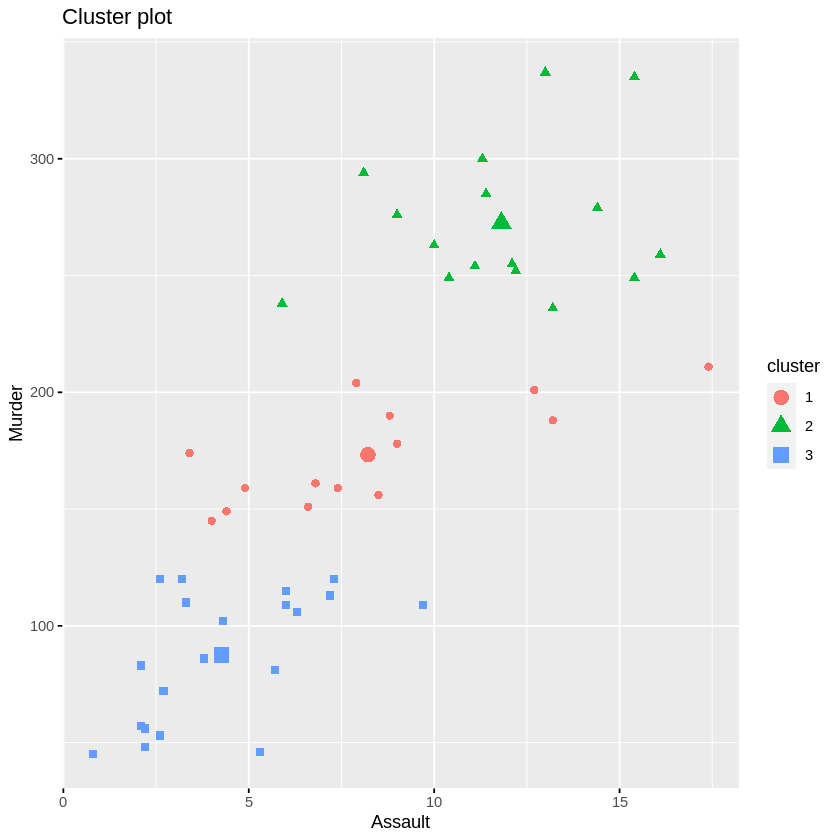

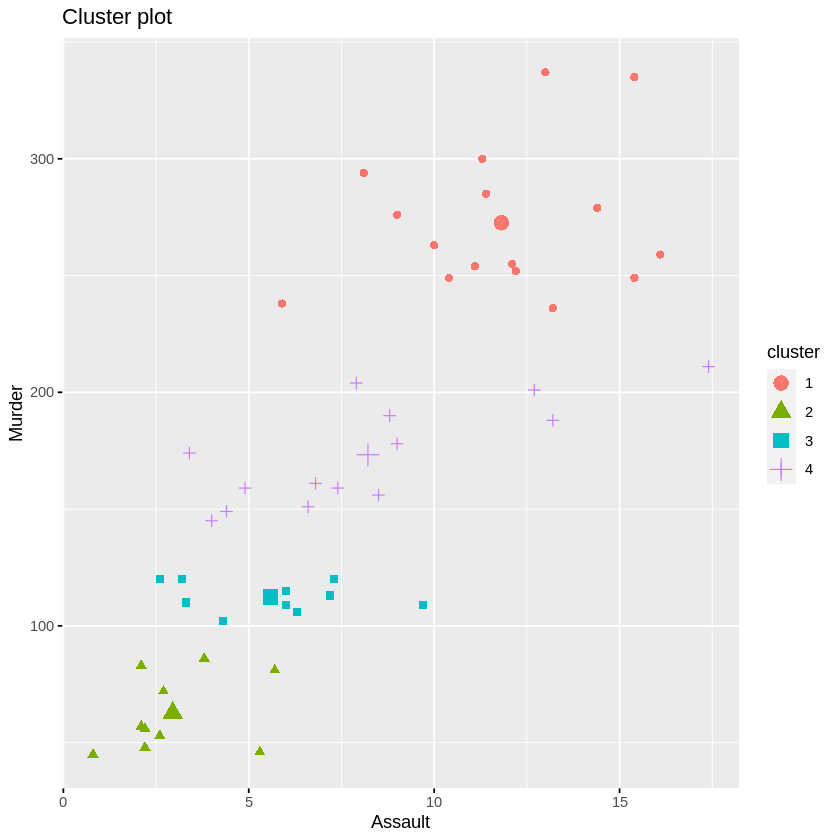

In [60]:
fviz_cluster(km.res_task2,df_task2,geom="point",ellipse=FALSE,pointsize=2, ylab = "Murder", xlab = "Assault", stand = FALSE)
fviz_cluster(km.res_task2.2,df_task2,geom="point",ellipse=FALSE,pointsize=2, ylab = "Murder", xlab = "Assault", stand = FALSE)

# Task 3 - What variables have you used? Why?

I chose to go with murder and assault since these two variables gave
the best percentage. Also, it was easy to print a good graph over the cluster data. One could also pick all four since it is still possible
to calculate the distances between the points in a 4d graph, or any combinations of them.

In [ ]:
# Task 4 - Describe the clusters obtained

The clusters obtained with k=3 with the two variables murder and assualt,
have three cluster groups containing 14, 16 and 20 points. This is with an
accuracy of 89.3%. Doing this with k=4 we obtained four cluster groups
containing 16, 10, 10 and 14 points. Some of the clusters are sparse and
should maybe been devided further, but I still think this looks like a good
grouping.